# Data Cleaning

In [2]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [793]:
# Reading in the 2021 and 2022 data
df_2022 = pd.read_csv('data/FOCW_CBI_21_22_shift.csv')

In [794]:
# Reading the 2023 data
df_2023 = pd.read_csv("data/SHIFTS (2).csv")

In [795]:
df_2022.head(1)

,objectid,YEAR,VISIT_DATE,DAY_OF_WEEK,AGENCY_DESC,AGENCY_ID,SITE_NAME,SITE_ID,LAT,LONG,...,PAY_VOL,START_SHIFT,TRAILERS,INSPECTIONS,END_SHIFT,SHIFT_LENGTH,SURVEY,COMMENTS,TOTALINSP,NUMINVASIVE
0,8977,2021,5/28/2021,Fri,FOCW (Friends of the Cobbossee Watershed),50,Launch Drive,376,44.23825,-69.96728,...,Paid,12:00,10.0,Yes,18:00,360,During shift/at ramp,NaN,33,NaN


In [796]:
df_2023.head(1)

,ObjectID,DATE1,DAY_OF_WEEK,AGENCY_DESC,SITE_NAME,TOWN,WATERBODY,FNAME,LNAME,INSPECTOR_ID,...,SHIFT_LENGTH,TRAILERS,TOTAL_NM,TOTAL_M,TOTALINSP,COMMENTS,NUMINVASIVE,GlobalID,x,y
0,71,5/12/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,Emily,Lucas,5305,...,190,2.0,0.0,5,5.0,\r\n,0.0,2efd8f58-5a9e-4b75-8e56-4cb720b404ab,-69.96728,44.23825


In [797]:
# Renaming variables from 2021/2022 data to match 2023 df names
df_2022.rename(columns={'objectid': 'ObjectID', 'VISIT_DATE': 'DATE1', 'START_SHIFT': 'SHIFT_START', 'END_SHIFT': 'SHIFT_END'}, inplace=True)

In [798]:
df_2023.drop(columns=['ObjectID', 'AGENCY_DESC', 'FNAME', 'LNAME', 'NUMINVASIVE', 'TOTAL_NM', 'TOTAL_M', 'COMMENTS', 'GlobalID', 'x', 'y'], inplace=True)

The names of the inspectors aren't necessary and should be dropped to preserve employee privacy. The number of invasive species identified, the number of motorized vehicles, and the number of non-motorized vehicles are all variables that would not be known before a shift begins. These variables are actually dependent on the number of inspections (the dependent variable in the model) rather than predictive of this variable.

Comments, IDs of the site, and longitutde/ latitude are all redundant with the site_name. 

In [799]:
df_2022.drop(columns=['ObjectID', 'YEAR', 'AGENCY_DESC', 'AGENCY_ID', 'SITE_ID', 'LAT', 'LONG', 'SURVEY', 'COMMENTS', 'NUMINVASIVE'], inplace=True)

In [800]:
df_2023.head(1)

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,SHIFT_LENGTH,TRAILERS,TOTALINSP
0,5/12/2023,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,5305,Paid,08:50,12:00,190,2.0,5.0


In [801]:
df_2022.head(1)

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATER_REGION_ID,WATERBODY,MIDAS,NAME_FL,FNAME,LNAME,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,INSPECTIONS,SHIFT_END,SHIFT_LENGTH,TOTALINSP
0,5/28/2021,Fri,Launch Drive,Monmouth,698,Cobbosseecontee Lake,5236,Kathryn Ross,Kathryn,Ross,4771,Paid,12:00,10.0,Yes,18:00,360,33


In [802]:
df_2022.drop(columns=['WATER_REGION_ID', 'MIDAS', 'NAME_FL', 'FNAME', 'LNAME', 'INSPECTIONS'], inplace=True)

In [803]:
df_2022.head(1)

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,SHIFT_LENGTH,TOTALINSP
0,5/28/2021,Fri,Launch Drive,Monmouth,Cobbosseecontee Lake,4771,Paid,12:00,10.0,18:00,360,33


In [804]:
# Concatenating the 2021, 2022, and 2023 data into 1 df
shift_df = pd.concat([df_2022, df_2023], axis=0, ignore_index=False)

In [805]:
shift_df.dtypes

DATE1            object
DAY_OF_WEEK      object
SITE_NAME        object
TOWN             object
WATERBODY        object
INSPECTOR_ID      int64
PAY_VOL          object
SHIFT_START      object
TRAILERS        float64
SHIFT_END        object
SHIFT_LENGTH      int64
TOTALINSP       float64
dtype: object

In [806]:
shift_df.shape

(2669, 12)

### Data Cleaning

In [807]:
shift_df.SITE_NAME.value_counts()

Launch Drive Cobbosseecontee             437
East Winthrop Cobbosseecontee            349
Lakeside Marina Cobbosseecontee          348
Old Kents Hill Road                      264
Whippoorwill Road                        183
Thorofare Rd                             168
Rt 41 North Basin Maranacook             151
Beach Road                               140
Wilson Pond Road                         135
Launch Drive                             132
Norcross Point South Basin Maranacook    130
Augusta West Kampground                  114
East Winthrop                             63
Holmes Road Annabessacook                 55
Name: SITE_NAME, dtype: int64

In [808]:
site_name_dict = {'2022_name': '2023:name',
                  'Beach Road': 'Beach Road',
                  'East Winthrop Cobbosseecontee': 'East Winthrop Cobbosseecontee',
                  'East Winthrop': 'East Winthrop Cobbosseecontee',
                  'Holmes Road Annabessacook': 'Holmes Road Annabessacook',
                  'Augusta West Kampground': 'Holmes Road Annabessacook',
                  'Lakeside Marina Cobbosseecontee': 'Lakeside Marina Cobbosseecontee',
                  'Launch Drive Cobbosseecontee': 'Launch Drive Cobbosseecontee',
                  'Launch Drive': 'Launch Drive Cobbosseecontee',
                  'Norcross Point South Basin Maranacook': 'Norcross Point South Basin Maranacook',
                  'Old Kents Hill Road': 'Old Kents Hill Road',
                  'Rt 41 North Basin Maranacook': 'Rt 41 North Basin Maranacook',
                  'Thorofare Rd': 'Thorofare Rd',
                  'Whippoorwill Road': 'Whippoorwill Road',
                  'Wilson Pond Road': 'Wilson Pond Road'}



In [809]:
shift_df['SITE_NAME'] = shift_df['SITE_NAME'].map(site_name_dict)
shift_df.head(1)

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,SHIFT_LENGTH,TOTALINSP
0,5/28/2021,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,12:00,10.0,18:00,360,33.0


In [810]:
shift_df.SITE_NAME.value_counts()

Launch Drive Cobbosseecontee             569
East Winthrop Cobbosseecontee            412
Lakeside Marina Cobbosseecontee          348
Old Kents Hill Road                      264
Whippoorwill Road                        183
Holmes Road Annabessacook                169
Thorofare Rd                             168
Rt 41 North Basin Maranacook             151
Beach Road                               140
Wilson Pond Road                         135
Norcross Point South Basin Maranacook    130
Name: SITE_NAME, dtype: int64

In [811]:
shift_df = shift_df[shift_df['SITE_NAME'] != 'Lakeside Marina Cobbosseecontee'].copy()
shift_df.shape

(2321, 12)

In [812]:
shift_df.SITE_NAME.value_counts()

Launch Drive Cobbosseecontee             569
East Winthrop Cobbosseecontee            412
Old Kents Hill Road                      264
Whippoorwill Road                        183
Holmes Road Annabessacook                169
Thorofare Rd                             168
Rt 41 North Basin Maranacook             151
Beach Road                               140
Wilson Pond Road                         135
Norcross Point South Basin Maranacook    130
Name: SITE_NAME, dtype: int64

### Combining shift data with weather data

In [822]:
# Reading in weather data
weather = pd.read_csv('data/weather.csv')

Weather data was requested from the National Centers for Environmental Information https://www.ncei.noaa.gov/. Data was requested for the years 2021-2023 for Winthrop, ME. 

In [823]:
weather.head(1)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00179721,"WINTHROP, ME US",44.30656,-69.97016,63.4,2021-01-01,NaN,NaN,0.0,0.0,0.0,42.0,20.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN


In [824]:
weather.drop(columns=['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DAPR', 'MDPR', 'SNWD', 'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11', 'SNOW', 'TOBS'], inplace=True) 

In [825]:
weather.head()

,NAME,DATE,PRCP,TMAX,TMIN
0,"WINTHROP, ME US",2021-01-01,0.00,42.0,20.0
1,"WINTHROP, ME US",2021-01-03,NaN,NaN,NaN
2,"WINTHROP, ME US",2021-01-04,0.00,34.0,26.0
3,"WINTHROP, ME US",2021-01-05,0.04,35.0,28.0
4,"WINTHROP, ME US",2021-01-06,0.03,32.0,25.0


In [826]:
weather.NAME.value_counts()

READFIELD 2.0 NNE, ME US    1050
WINTHROP, ME US             1037
WAYNE 3.2 SSE, ME US         988
WINTHROP 1.8 WSW, ME US      301
WINTHROP 5.8 NE, ME US       107
Name: NAME, dtype: int64

In [827]:
weather.isna().sum()

NAME       0
DATE       0
PRCP      44
TMAX    2542
TMIN    2537
dtype: int64

In [828]:
weather.shape

(3483, 5)

In [743]:
#weather.dropna(inplace=True)

In [744]:
#weather.shape

In [745]:
weather.describe()

,PRCP,TMAX,TMIN
count,3439.000000,941.000000,946.000000
mean,0.131329,61.587673,41.734672
std,0.345630,19.305771,18.332104
min,0.000000,8.000000,-17.000000
25%,0.000000,46.000000,28.000000
50%,0.000000,65.000000,44.500000
75%,0.080000,78.000000,57.000000
max,5.150000,95.000000,74.000000


In [746]:
weather = weather[weather['NAME']== 'WINTHROP, ME US']

In [747]:
weather.shape

(1037, 5)

In [748]:
weather.isna().sum()

NAME     0
DATE     0
PRCP    22
TMAX    96
TMIN    91
dtype: int64

In [749]:
# The precipitation and temperature data for some dates is missing.
weather.fillna(method='bfill', inplace=True)

#### Dealing with missing Weather Data:
There are 4 potential solutions for dealing with the missing weather data:
1. Dropping the missing data since there are less than 100 days with missing data
    - Downsides: **will also need to drop dates from what-if scenarios if weather data is missing**, reduces the size of the data
    - Upsides: higher model metrics compared to ffill and comparable to bfill
2. Back-filling the data from other dates
    - Downsides: multiple dates in a row with missing data, does not capture sudden changes in weather common in Maine, especially precipitation
    - Upsides: may be somewhat accurate for temperature which wouldn't change as much day to day, better metrics than ffill
3. Forward-filling the data from other dates
    - Downsides: multiple dates in a row with missing data, issues capturing accurate precipitation data, worst model metrics
    - Upsides: may be useful in conjunction with bfill for sequences of multiple days of missing data
4. Combination of forward-filling and back-filling
    - Need to try and determine impact on model
    - Still may not be effective at estimating missing precipitation data
5. Using weather data from other nearby stations to fill in the missing days
    - Need to determine if the data for those dates is also missing at other sites

In [750]:
weather.isna().sum()

NAME    0
DATE    0
PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [751]:
weather.head(25)

,NAME,DATE,PRCP,TMAX,TMIN
0,"WINTHROP, ME US",2021-01-01,0.00,42.0,20.0
1,"WINTHROP, ME US",2021-01-03,0.00,34.0,26.0
2,"WINTHROP, ME US",2021-01-04,0.00,34.0,26.0
3,"WINTHROP, ME US",2021-01-05,0.04,35.0,28.0
4,"WINTHROP, ME US",2021-01-06,0.03,32.0,25.0
5,"WINTHROP, ME US",2021-01-07,0.00,39.0,25.0
6,"WINTHROP, ME US",2021-01-08,0.00,40.0,23.0
7,"WINTHROP, ME US",2021-01-09,0.00,33.0,15.0
8,"WINTHROP, ME US",2021-01-10,0.00,33.0,15.0
9,"WINTHROP, ME US",2021-01-11,0.00,33.0,15.0


In [752]:
# Renaming column to match inspections column
weather.rename(columns={'DATE': 'DATE1'}, inplace=True)

In [753]:
weather.head(1)

,NAME,DATE1,PRCP,TMAX,TMIN
0,"WINTHROP, ME US",2021-01-01,0.0,42.0,20.0


In [754]:
weather['DATE1'] = pd.to_datetime(weather['DATE1'])

In [755]:
weather.head(1)

,NAME,DATE1,PRCP,TMAX,TMIN
0,"WINTHROP, ME US",2021-01-01,0.0,42.0,20.0


In [756]:
weather['DATE1'] = weather['DATE1'].dt.strftime('%m/%d/%Y')

In [757]:
weather['DATE1']=pd.to_datetime(weather['DATE1'])

In [758]:
weather.dtypes

NAME             object
DATE1    datetime64[ns]
PRCP            float64
TMAX            float64
TMIN            float64
dtype: object

In [759]:
weather.drop(columns=['NAME'], inplace=True)

In [760]:
weather.head(1)

,DATE1,PRCP,TMAX,TMIN
0,2021-01-01,0.0,42.0,20.0


In [761]:
shift_df['DATE1'] = pd.to_datetime(shift_df['DATE1'])

In [762]:
# Merging weather data with inspection data
df = pd.merge(left=shift_df, right=weather, how='left', on='DATE1')

In [763]:
df.isna().sum()

DATE1             0
DAY_OF_WEEK       0
SITE_NAME         0
TOWN              0
WATERBODY         0
INSPECTOR_ID      0
PAY_VOL           0
SHIFT_START       0
TRAILERS        204
SHIFT_END         0
SHIFT_LENGTH      0
TOTALINSP         2
PRCP              0
TMAX              0
TMIN              0
dtype: int64

In [764]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,SHIFT_LENGTH,TOTALINSP,PRCP,TMAX,TMIN
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,12:00,10.0,18:00,360,33.0,0.00,72.0,45.0
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,12:00,1.0,18:00,360,13.0,0.00,72.0,45.0
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,12:00,0.0,18:00,360,1.0,0.00,72.0,45.0
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,12:00,1.0,18:00,360,2.0,0.00,72.0,45.0
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,7:00,1.0,17:00,600,11.0,0.02,62.0,45.0


In [765]:
df.shape

(2321, 15)

In [766]:
df.reset_index(drop=True, inplace=True)

In [767]:
df.shape

(2321, 15)

In [768]:
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

Empty DataFrame
Columns: [DATE1, DAY_OF_WEEK, SITE_NAME, TOWN, WATERBODY, INSPECTOR_ID, PAY_VOL, SHIFT_START, TRAILERS, SHIFT_END, SHIFT_LENGTH, TOTALINSP, PRCP, TMAX, TMIN]
Index: []


# Feature Engineering

### Capturing impact of time of day
Goal: Create columns for the part of the day when a shift starts and ends

#### Creating month, year, and start and end shifts by daypart columns:

In [769]:
# Convert 'date1' to datetime
df['DATE'] = pd.to_datetime(df['DATE1'], format='%Y/%m/%d')

# Create 'month' and 'year' columns
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year

In [770]:
df.SHIFT_START = pd.to_datetime(df.SHIFT_START, format='%H:%M')
df.SHIFT_END = pd.to_datetime(df.SHIFT_END)

In [771]:
df['SHIFT_START_CATEGORY'] = pd.cut(pd.to_datetime(df['SHIFT_START'], format='%H:%M').dt.hour,
                                    bins =[-1, 8, 11, 14, 17, 24],
                                    labels=['Early Morning', 'Morning', 'Afternoon', 'Late Afternoon', 'Evening'])
                        

In [772]:
df['SHIFT_END_CATEGORY'] = pd.cut(pd.to_datetime(df['SHIFT_END'], format='%H:%M').dt.hour,
                                    bins =[-1, 8, 11, 14, 17, 19, 24],
                                    labels=['Early Morning', 'Morning', 'Afternoon', 'Late Afternoon', 'Evening', 'Night'])
                        

In [773]:
df.SHIFT_START_CATEGORY.value_counts()

Early Morning     1138
Afternoon          844
Morning            276
Late Afternoon      63
Evening              0
Name: SHIFT_START_CATEGORY, dtype: int64

In [774]:
df.SHIFT_END_CATEGORY.value_counts()

Evening           983
Afternoon         749
Late Afternoon    422
Early Morning      78
Morning            63
Night              26
Name: SHIFT_END_CATEGORY, dtype: int64

In [775]:
df.isna().sum()

DATE1                     0
DAY_OF_WEEK               0
SITE_NAME                 0
TOWN                      0
WATERBODY                 0
INSPECTOR_ID              0
PAY_VOL                   0
SHIFT_START               0
TRAILERS                204
SHIFT_END                 0
SHIFT_LENGTH              0
TOTALINSP                 2
PRCP                      0
TMAX                      0
TMIN                      0
DATE                      0
month                     0
year                      0
SHIFT_START_CATEGORY      0
SHIFT_END_CATEGORY        0
dtype: int64

In [776]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,SHIFT_LENGTH,TOTALINSP,PRCP,TMAX,TMIN,DATE,month,year,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,1900-01-01 12:00:00,10.0,2023-12-05 18:00:00,360,33.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,360,13.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,1900-01-01 12:00:00,0.0,2023-12-05 18:00:00,360,1.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,360,2.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,1900-01-01 07:00:00,1.0,2023-12-05 17:00:00,600,11.0,0.02,62.0,45.0,2021-05-29,5,2021,Early Morning,Late Afternoon


In [777]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,SHIFT_LENGTH,TOTALINSP,PRCP,TMAX,TMIN,DATE,month,year,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,1900-01-01 12:00:00,10.0,2023-12-05 18:00:00,360,33.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,360,13.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,1900-01-01 12:00:00,0.0,2023-12-05 18:00:00,360,1.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,360,2.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,1900-01-01 07:00:00,1.0,2023-12-05 17:00:00,600,11.0,0.02,62.0,45.0,2021-05-29,5,2021,Early Morning,Late Afternoon


In [778]:
df.INSPECTOR_ID.value_counts()

4174    131
5670    116
3796    113
5006    111
3504    109
       ... 
5144      1
5672      1
4729      1
5655      1
5652      1
Name: INSPECTOR_ID, Length: 103, dtype: int64

### Handling Inspector_ID:
- Some inspectors are more experienced than others, returning from prior years, working more shifts, and receiving higher pay
- According to the program coordinator, there were some issues in 2023 with inspectors not inspecting all present boats
- Goal: create a variable to capture the experience level of the inspector stationed for that shift

In [779]:
df['ID_COUNT'] = df.groupby('INSPECTOR_ID')['INSPECTOR_ID'].transform('count')

In [780]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,...,TOTALINSP,PRCP,TMAX,TMIN,DATE,month,year,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY,ID_COUNT
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,1900-01-01 12:00:00,10.0,2023-12-05 18:00:00,...,33.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,55
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,...,13.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,131
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,1900-01-01 12:00:00,0.0,2023-12-05 18:00:00,...,1.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,56
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,...,2.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,16
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,1900-01-01 07:00:00,1.0,2023-12-05 17:00:00,...,11.0,0.02,62.0,45.0,2021-05-29,5,2021,Early Morning,Late Afternoon,57


In [781]:
df.describe()

,INSPECTOR_ID,TRAILERS,SHIFT_LENGTH,TOTALINSP,PRCP,TMAX,TMIN,month,year,ID_COUNT
count,2321.000000,2117.000000,2321.000000,2319.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,4954.877639,4.420406,380.367514,16.492454,0.123593,79.532960,59.227919,7.197760,2022.075399,58.291685
std,1108.499935,28.791702,137.667067,17.135173,0.312013,8.551561,6.630534,1.074434,0.791061,39.012197
min,1103.000000,0.000000,14.000000,0.000000,0.000000,50.000000,40.000000,5.000000,2021.000000,1.000000
25%,4715.000000,1.000000,360.000000,4.000000,0.000000,75.000000,54.000000,6.000000,2021.000000,28.000000
50%,5353.000000,2.000000,360.000000,11.000000,0.000000,81.000000,60.000000,7.000000,2022.000000,55.000000
75%,5648.000000,5.000000,375.000000,23.000000,0.080000,86.000000,64.000000,8.000000,2023.000000,82.000000
max,6112.000000,1300.000000,720.000000,105.000000,2.320000,95.000000,73.000000,10.000000,2023.000000,131.000000


In [782]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,...,TOTALINSP,PRCP,TMAX,TMIN,DATE,month,year,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY,ID_COUNT
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,1900-01-01 12:00:00,10.0,2023-12-05 18:00:00,...,33.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,55
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,...,13.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,131
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,1900-01-01 12:00:00,0.0,2023-12-05 18:00:00,...,1.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,56
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,...,2.0,0.00,72.0,45.0,2021-05-28,5,2021,Afternoon,Evening,16
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,1900-01-01 07:00:00,1.0,2023-12-05 17:00:00,...,11.0,0.02,62.0,45.0,2021-05-29,5,2021,Early Morning,Late Afternoon,57


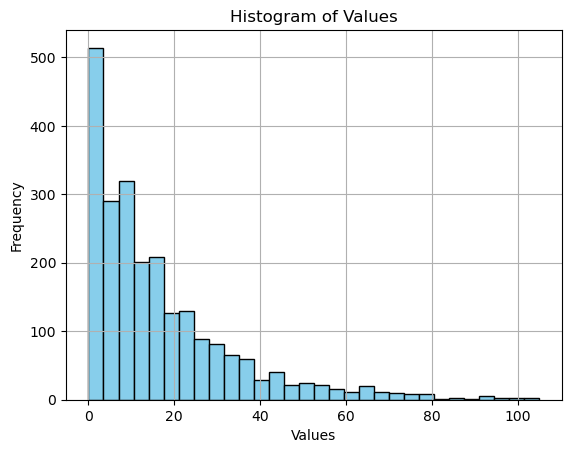

In [783]:
df['TOTALINSP'].hist(bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show();

### Capturing impact of holidays
Goal: Engineer a column for weather the date is a holiday or part of a holiday weekend

In [784]:
# List of holidays
# 2021: Monday, May 31 Memorial Day, Sunday July 4 (Observed Monday), Monday September 6 (Labor Day), Sunday May 9 (Mother's Day), Father's Day (Sunday, June 20)
# 2022: Sunday May 08, Mother's Day, 'Monday May 30 Memorial Day, Monday September 5 Labor Day, Monday July 4, Sunday June 19 Father's Day
# 2023: Monday, May 29 Memorial Day, Monday June19 Juneteenth, Tuesday, July 04, Monday September 04 Labor Day, Mother's Day Sunday May 14, Father's Day Sunday June 18
#'2021-05-09', '2022-05-30', , '2023-06-19'
holiday_list = ['2021-05-31', '2021-07-04', '2021-09-06', '2021-06-20',
                '2022-05-08', '2022-05-30', '2022-07-04', '2022-06-19',
                '2023-05-29', '2023-07-04', '2023-09-04', '2023-06-18']


In [785]:
#df['holiday']= np.where(df['DATE1'].isin(holiday_list), 1, 0)

In [786]:
# List of holidays
# 2021: Monday, May 31 Memorial Day, Sunday July 4 (Observed Monday), Monday September 6 (Labor Day), Sunday May 9 (Mother's Day), Father's Day (Sunday, June 20)
# 2022: Sunday May 08, Mother's Day, 'Monday May 30 Memorial Day, Monday September 5 Labor Day, Monday July 4, Sunday June 19 Father's Day
# 2023: Monday, May 29 Memorial Day, Monday June19 Juneteenth, Tuesday, July 04, Monday September 04 Labor Day, Mother's Day Sunday May 14, Father's Day Sunday June 18
#'2021-05-09', '2022-05-08', , '2023-06-19'
holiday_list_weekends = ['2021-05-31', '2021-05-29', '2021-05-30', '2021-07-04', '2021-07-03', '2021-07-05', '2021-09-06', '2021-09-04', '2021-09-05', '2021-06-19', '2021-06-20',
                '2022-05-28', '2022-05-29', '2022-05-30', '2022-07-02', '2022-07-03', '2022-07-04', '2022-06-19', '2022-09-03', '2022-09-04', '2022-06-18',
                '2023-05-29', '2023-05-27', '2023-05-28', '2023-07-01', '2023-07-02', '2023-07-04', '2023-09-02', '2023-09-03', '2023-09-04', '2023-06-18', '2023-06-17']

In [787]:
#df['holiday_weekends']= np.where(df['DATE1'].isin(holiday_list_weekends), 1, 0)

In [788]:
holiday_list_weekends = ['2021-05-31', '2021-05-29', '2021-05-30', '2021-07-04', '2021-07-03', '2021-07-05', '2021-09-06', '2021-09-04', '2021-09-05', '2021-06-19', '2021-06-20',
                '2022-05-28', '2022-05-29', '2022-05-30', '2022-07-02', '2022-07-03', '2022-07-04', '2022-06-19', '2022-09-03', '2022-09-04', '2022-06-18',
                '2023-05-29', '2023-05-27', '2023-05-28', '2023-07-01', '2023-07-02', '2023-07-04', '2023-09-02', '2023-09-03', '2023-09-04', '2023-06-18', '2023-06-17']
df['holiday']= np.where(df['DATE1'].isin(holiday_list_weekends), 1, 0)

In [789]:
# Taking father's day out of the holiday weekend
holiday_list_weekends = ['2021-05-31', '2021-05-29', '2021-05-30', '2021-07-04', '2021-07-03', '2021-07-05', '2021-09-06', '2021-09-04', '2021-09-05',
                '2022-05-28', '2022-05-29', '2022-05-30', '2022-07-02', '2022-07-03', '2022-07-04', '2022-09-03', '2022-09-04',
                '2023-05-29', '2023-05-27', '2023-05-28', '2023-07-01', '2023-07-02', '2023-07-04', '2023-09-02', '2023-09-03', '2023-09-04']
#df['holiday']= np.where(df['DATE'].isin(holiday_list_weekends), 1, 0)

In [790]:
df.to_csv('data/df2_with_weather.csv', index=False)

In [791]:
#df.to_csv('data/df1_with_weather1.csv', index=False)

In [3]:
df = pd.read_csv('data/df2_with_weather.csv')

In [5]:
df.dtypes

DATE1                    object
DAY_OF_WEEK              object
SITE_NAME                object
TOWN                     object
WATERBODY                object
INSPECTOR_ID              int64
PAY_VOL                  object
SHIFT_START              object
TRAILERS                float64
SHIFT_END                object
SHIFT_LENGTH              int64
TOTALINSP               float64
PRCP                    float64
TMAX                    float64
TMIN                    float64
DATE                     object
month                     int64
year                      int64
SHIFT_START_CATEGORY     object
SHIFT_END_CATEGORY       object
ID_COUNT                  int64
holiday                   int64
early_morning             int64
morning                   int64
afternoon                 int64
late_afternoon            int64
evening                   int64
dtype: object

In [6]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,...,year,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY,ID_COUNT,holiday,early_morning,morning,afternoon,late_afternoon,evening
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,1900-01-01 12:00:00,10.0,2023-12-05 18:00:00,...,2021,Afternoon,Evening,55,0,0,0,0,0,0
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,...,2021,Afternoon,Evening,131,0,0,0,0,0,0
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,1900-01-01 12:00:00,0.0,2023-12-05 18:00:00,...,2021,Afternoon,Evening,56,0,0,0,0,0,0
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,1900-01-01 12:00:00,1.0,2023-12-05 18:00:00,...,2021,Afternoon,Evening,16,0,0,0,0,0,0
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,1900-01-01 07:00:00,1.0,2023-12-05 17:00:00,...,2021,Early Morning,Late Afternoon,57,1,0,0,0,0,0


In [7]:
df['SHIFT_START'] = pd.to_datetime(df['SHIFT_START']).dt.time
df['SHIFT_END'] = pd.to_datetime(df['SHIFT_END']).dt.time

In [8]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,...,year,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY,ID_COUNT,holiday,early_morning,morning,afternoon,late_afternoon,evening
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,12:00:00,10.0,18:00:00,...,2021,Afternoon,Evening,55,0,0,0,0,0,0
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,12:00:00,1.0,18:00:00,...,2021,Afternoon,Evening,131,0,0,0,0,0,0
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,12:00:00,0.0,18:00:00,...,2021,Afternoon,Evening,56,0,0,0,0,0,0
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,12:00:00,1.0,18:00:00,...,2021,Afternoon,Evening,16,0,0,0,0,0,0
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,07:00:00,1.0,17:00:00,...,2021,Early Morning,Late Afternoon,57,1,0,0,0,0,0


In [14]:
# More feature engineering

df['early_morning'] = 0
df['morning'] = 0
df['afternoon'] = 0
df['late_afternoon'] = 0
df['evening'] = 0
df['night'] =0

# Define function to set values based on shift start and end times
def set_shift_coverage(row):
    start_hour = row['SHIFT_START'].hour
    end_hour = row['SHIFT_END'].hour
    
    if start_hour < 8 and end_hour >= 8:
        row['early_morning'] = 1
    if start_hour <= 8 and end_hour >= 11:
        row['morning'] = 1
    if start_hour < 11 and end_hour >= 14:
        row['afternoon'] = 1
    if start_hour < 14 and end_hour >= 17:
        row['late_afternoon'] = 1
    if start_hour < 17 and end_hour >= 19:
        row['evening'] = 1
    if start_hour < 19 and end_hour >= 20:
        row['evening'] = 1
    
    return row

# Apply the function to each row
df = df.apply(set_shift_coverage, axis=1)


In [15]:
df.head()

,DATE1,DAY_OF_WEEK,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,TRAILERS,SHIFT_END,...,SHIFT_START_CATEGORY,SHIFT_END_CATEGORY,ID_COUNT,holiday,early_morning,morning,afternoon,late_afternoon,evening,night
0,2021-05-28,Fri,Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,4771,Paid,12:00:00,10.0,18:00:00,...,Afternoon,Evening,55,0,0,0,0,1,0,0
1,2021-05-28,Fri,Whippoorwill Road,Litchfield,Woodbury Pond,4174,Paid,12:00:00,1.0,18:00:00,...,Afternoon,Evening,131,0,0,0,0,1,0,0
2,2021-05-28,Fri,Holmes Road Annabessacook,Winthrop,Annabessacook Lake,4769,Paid,12:00:00,0.0,18:00:00,...,Afternoon,Evening,56,0,0,0,0,1,0,0
3,2021-05-28,Fri,East Winthrop Cobbosseecontee,Winthrop,Cobbosseecontee Lake,4485,Paid,12:00:00,1.0,18:00:00,...,Afternoon,Evening,16,0,0,0,0,1,0,0
4,2021-05-29,Sat,Thorofare Rd,Litchfield,Pleasant Pond,4944,Paid,07:00:00,1.0,17:00:00,...,Early Morning,Late Afternoon,57,1,1,1,1,1,0,0


In [16]:
df.to_csv('data/df3_with_weather.csv', index= False)

In [17]:
# Adding the shift coverage categories made the model worse not better

In [18]:
# More data engineering on ID_COUNT

df = pd.read_csv('data/df2_with_weather.csv')

In [19]:
df.describe()

,INSPECTOR_ID,TRAILERS,SHIFT_LENGTH,TOTALINSP,PRCP,TMAX,TMIN,month,year,ID_COUNT,holiday
count,2321.000000,2117.000000,2321.000000,2319.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,4954.877639,4.420406,380.367514,16.492454,0.123593,79.532960,59.227919,7.197760,2022.075399,58.291685,0.176217
std,1108.499935,28.791702,137.667067,17.135173,0.312013,8.551561,6.630534,1.074434,0.791061,39.012197,0.381087
min,1103.000000,0.000000,14.000000,0.000000,0.000000,50.000000,40.000000,5.000000,2021.000000,1.000000,0.000000
25%,4715.000000,1.000000,360.000000,4.000000,0.000000,75.000000,54.000000,6.000000,2021.000000,28.000000,0.000000
50%,5353.000000,2.000000,360.000000,11.000000,0.000000,81.000000,60.000000,7.000000,2022.000000,55.000000,0.000000
75%,5648.000000,5.000000,375.000000,23.000000,0.080000,86.000000,64.000000,8.000000,2023.000000,82.000000,0.000000
max,6112.000000,1300.000000,720.000000,105.000000,2.320000,95.000000,73.000000,10.000000,2023.000000,131.000000,1.000000
